In [ ]:
import numpy as np
import pandas as pd
import copy as cp

In [ ]:
crashes=pd.read_csv('n_crash_data_2009.csv')
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422462 entries, 0 to 422461
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   case_id                          422462 non-null  int64  
 1   jurisdiction                     421610 non-null  float64
 2   officer_id                       420351 non-null  object 
 3   chp_shift                        422462 non-null  object 
 4   population                       422462 non-null  object 
 5   county_city_location             422462 non-null  int64  
 6   county_location                  422462 non-null  object 
 7   special_condition                422462 non-null  int64  
 8   beat_type                        422462 non-null  object 
 9   chp_beat_type                    422462 non-null  object 
 10  chp_beat_class                   422462 non-null  object 
 11  beat_number                      387133 non-null  object 
 12  pr

In [ ]:
crashes.columns

Index(['case_id', 'jurisdiction', 'officer_id', 'chp_shift', 'population',
       'county_city_location', 'county_location', 'special_condition',
       'beat_type', 'chp_beat_type', 'chp_beat_class', 'beat_number',
       'primary_road', 'secondary_road', 'distance', 'direction',
       'intersection', 'state_highway_indicator', 'tow_away',
       'collision_severity', 'killed_victims', 'injured_victims',
       'party_count', 'primary_collision_factor', 'pcf_violation_category',
       'pcf_violation', 'hit_and_run', 'type_of_collision',
       'motor_vehicle_involved_with', 'pedestrian_action', 'road_surface',
       'lighting', 'control_device', 'chp_road_type', 'pedestrian_collision',
       'bicycle_collision', 'motorcycle_collision', 'truck_collision',
       'not_private_property', 'statewide_vehicle_type_at_fault',
       'chp_vehicle_type_at_fault', 'severe_injury_count',
       'other_visible_injury_count', 'complaint_of_pain_injury_count',
       'pedestrian_killed_count', 

In [ ]:
print('Total Number of Reported Crashes:', crashes['case_id'].nunique())

Total Number of Reported Crashes: 422462


In [ ]:
crashes["date"] = crashes['collision_date'].astype(str) +" "+ crashes['collision_time']
crashes['date'] = pd.to_datetime(crashes['date'], infer_datetime_format=True)

In [ ]:
crashes.head()

,case_id,jurisdiction,officer_id,chp_shift,population,county_city_location,county_location,special_condition,beat_type,chp_beat_type,...,bicyclist_killed_count,bicyclist_injured_count,motorcyclist_killed_count,motorcyclist_injured_count,collision_date,collision_time,process_date,weather,road_condition,date
0,3858022,1005.0,P379,not chp,>250000,1005,fresno,0,not chp,not chp,...,0,0,0,0,2009-02-03,17:11:00,2009-04-27,clear,normal,2009-02-03 17:11:00
1,3899441,9120.0,17248,2200 thru 0559,2500 to 10000,801,del norte,0,chp state highway,us highway,...,0,0,0,0,2009-02-28,01:45:00,2009-11-02,clear,normal,2009-02-28 01:45:00
2,3899442,9530.0,19005,0600 thru 1359,>250000,1942,los angeles,0,chp state highway,interstate,...,0,0,0,0,2009-02-09,10:20:00,2010-01-14,raining,normal,2009-02-09 10:20:00
3,3899445,9530.0,19284,1400 thru 2159,>250000,1942,los angeles,0,chp state highway,interstate,...,0,0,0,0,2009-02-18,15:50:00,2010-01-13,clear,normal,2009-02-18 15:50:00
4,3899446,9530.0,19289,1400 thru 2159,25000 to 50000,1939,los angeles,0,chp state highway,interstate,...,0,0,0,0,2009-02-11,17:35:00,2010-01-11,cloudy,normal,2009-02-11 17:35:00


In [ ]:
quarter = crashes['date'].dt.quarter
print(quarter)
print("-------------------")
print(quarter.unique())

0         1
1         1
2         1
3         1
4         1
         ..
422457    4
422458    4
422459    4
422460    4
422461    4
Name: date, Length: 422462, dtype: int64
-------------------
[1 2 3 4]


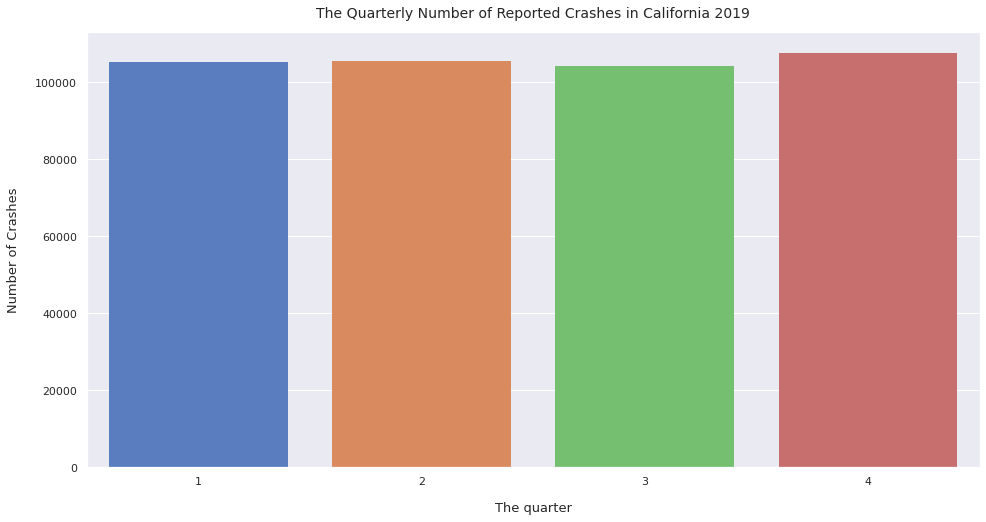

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

# Add column containing hour of day that crash occured.
crashes['quarter'] = crashes['date'].dt.quarter

# Plot number of crashes by hour of day.
plt.figure(figsize=(16,8))
s = sns.barplot(data=crashes.groupby('quarter')['case_id'].nunique().reset_index(), x='quarter', y='case_id', palette='muted', linewidth=0)
s.set_title('The Quarterly Number of Reported Crashes in California 2019', y=1.02, fontsize=14)
s.set_xlabel('The quarter', fontsize=13, labelpad=15)
s.set_ylabel('Number of Crashes', fontsize=13, labelpad=15)
plt.show()

In [ ]:
month = crashes['date'].dt.month
print(month)
print("-------------------")
print(month.unique())

0          2
1          2
2          2
3          2
4          2
          ..
422457    12
422458    12
422459    12
422460    12
422461    12
Name: date, Length: 422462, dtype: int64
-------------------
[ 2  3  1  4  9  7  6  5  8 11 10 12]


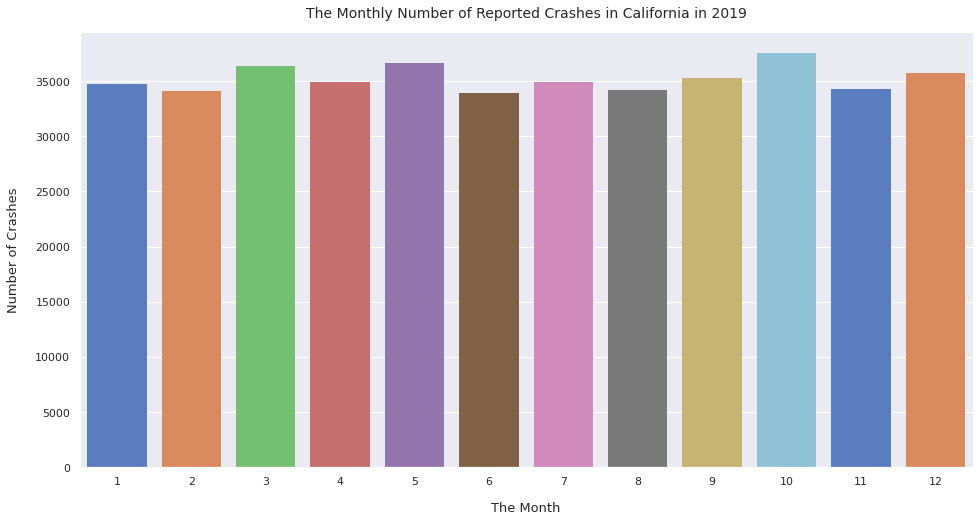

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

# Add column containing hour of day that crashes occured.
crashes['month'] = crashes['date'].dt.month

# Plot number of crashes by hour of day.
plt.figure(figsize=(16,8))
s = sns.barplot(data=crashes.groupby('month')['case_id'].nunique().reset_index(), x='month', y='case_id', palette='muted', linewidth=0)
s.set_title('The Monthly Number of Reported Crashes in California in 2019', y=1.02, fontsize=14)
s.set_xlabel('The Month', fontsize=13, labelpad=15)
s.set_ylabel('Number of Crashes', fontsize=13, labelpad=15)
plt.show()

In [ ]:
day = crashes['date'].dt.day
print(day)
print("-------------------")
print(day.unique())

0          3
1         28
2          9
3         18
4         11
          ..
422457    21
422458    21
422459    24
422460    21
422461    24
Name: date, Length: 422462, dtype: int64
-------------------
[ 3 28  9 18 11 13  8 10 17 14 12 15 16  7 25 19 23  5 27 22  4  1  6 30
 29 26 31 21  2 20 24]


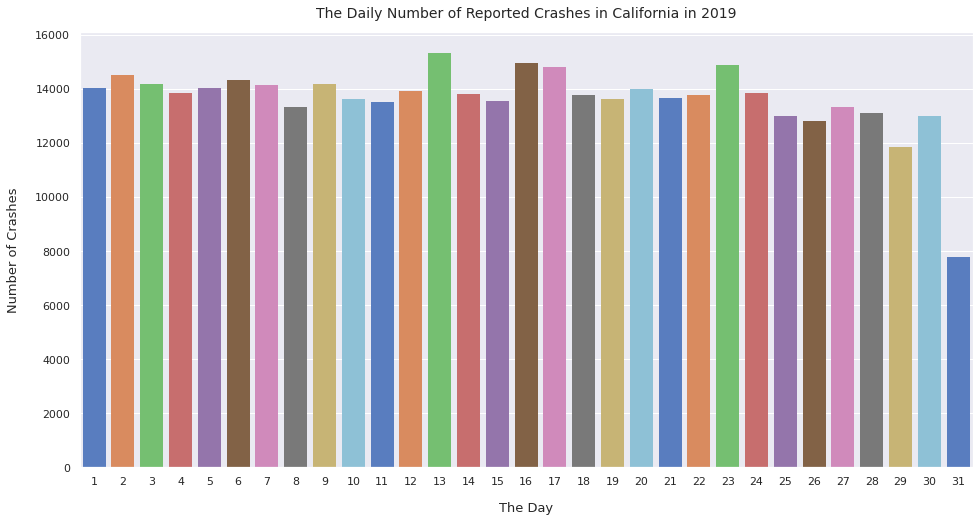

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

# Add column containing hour of day that crash occured.
crashes['day'] = crashes['date'].dt.day

# Plot number of crashes by hour of day.
plt.figure(figsize=(16,8))
s = sns.barplot(data=crashes.groupby('day')['case_id'].nunique().reset_index(), x='day', y='case_id', palette='muted', linewidth=0)
s.set_title('The Daily Number of Reported Crashes in California in 2019', y=1.02, fontsize=14)
s.set_xlabel('The Day', fontsize=13, labelpad=15)
s.set_ylabel('Number of Crashes', fontsize=13, labelpad=15)
plt.show()

In [ ]:
day_name = crashes['date'].dt.day_name()
print(day_name)
print("-------------------")
print(day_name.unique())

0           Tuesday
1          Saturday
2            Monday
3         Wednesday
4         Wednesday
            ...    
422457       Monday
422458       Monday
422459     Thursday
422460       Monday
422461     Thursday
Name: date, Length: 422462, dtype: object
-------------------
['Tuesday' 'Saturday' 'Monday' 'Wednesday' 'Friday' 'Sunday' 'Thursday']


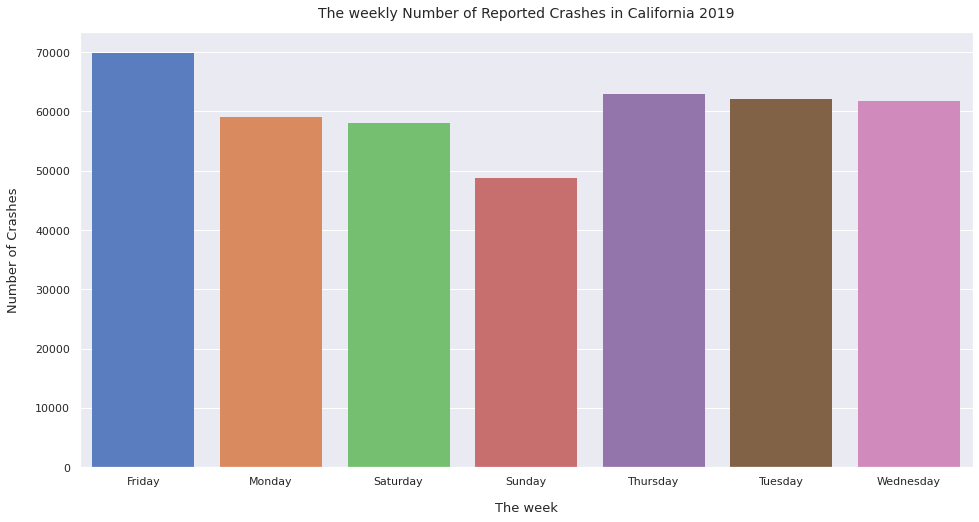

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

# Add column containing hour of day that crash occured.
crashes['day_name'] = crashes['date'].dt.day_name()

# Plot number of crashes by hour of day.
plt.figure(figsize=(16,8))
s = sns.barplot(data=crashes.groupby('day_name')['case_id'].nunique().reset_index(), x='day_name', y='case_id', palette='muted', linewidth=0)
s.set_title('The weekly Number of Reported Crashes in California 2019', y=1.02, fontsize=14)
s.set_xlabel('The week', fontsize=13, labelpad=15)
s.set_ylabel('Number of Crashes', fontsize=13, labelpad=15)
plt.show()

In [ ]:
hour = crashes['date'].dt.hour
print(hour)
print("-------------------")
print(hour.unique())

0         17
1          1
2         10
3         15
4         17
          ..
422457     8
422458    16
422459     9
422460    19
422461    11
Name: date, Length: 422462, dtype: int64
-------------------
[17  1 10 15 21 20 18 13  2 16 22  7  9 23  5  8 14  6 12 19 11  3  0  4]


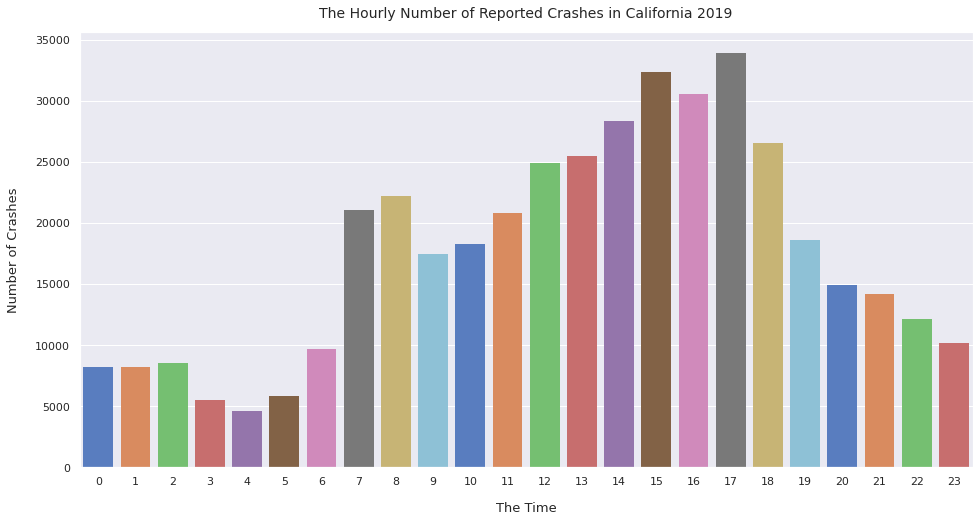

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

# Add column containing hour of day that crashes occured.
crashes['hour'] = crashes['date'].dt.hour

# Plot number of crashes by hour of day.
plt.figure(figsize=(16,8))
s = sns.barplot(data=crashes.groupby('hour')['case_id'].nunique().reset_index(), x='hour', y='case_id', palette='muted', linewidth=0)
s.set_title('The Hourly Number of Reported Crashes in California 2019', y=1.02, fontsize=14)
s.set_xlabel('The Time', fontsize=13, labelpad=15)
s.set_ylabel('Number of Crashes', fontsize=13, labelpad=15)
plt.show()

In [ ]:
crashes.columns

Index(['case_id', 'jurisdiction', 'officer_id', 'chp_shift', 'population',
       'county_city_location', 'county_location', 'special_condition',
       'beat_type', 'chp_beat_type', 'chp_beat_class', 'beat_number',
       'primary_road', 'secondary_road', 'distance', 'direction',
       'intersection', 'state_highway_indicator', 'tow_away',
       'collision_severity', 'killed_victims', 'injured_victims',
       'party_count', 'primary_collision_factor', 'pcf_violation_category',
       'pcf_violation', 'hit_and_run', 'type_of_collision',
       'motor_vehicle_involved_with', 'pedestrian_action', 'road_surface',
       'lighting', 'control_device', 'chp_road_type', 'pedestrian_collision',
       'bicycle_collision', 'motorcycle_collision', 'truck_collision',
       'not_private_property', 'statewide_vehicle_type_at_fault',
       'chp_vehicle_type_at_fault', 'severe_injury_count',
       'other_visible_injury_count', 'complaint_of_pain_injury_count',
       'pedestrian_killed_count', 

In [ ]:
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422462 entries, 0 to 422461
Data columns (total 61 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   case_id                          422462 non-null  int64         
 1   jurisdiction                     421610 non-null  float64       
 2   officer_id                       420351 non-null  object        
 3   chp_shift                        422462 non-null  object        
 4   population                       422462 non-null  object        
 5   county_city_location             422462 non-null  int64         
 6   county_location                  422462 non-null  object        
 7   special_condition                422462 non-null  int64         
 8   beat_type                        422462 non-null  object        
 9   chp_beat_type                    422462 non-null  object        
 10  chp_beat_class                   422462 non-

In [ ]:
object_columns=crashes.dtypes[crashes.dtypes == "object"].index.values.tolist()
print(object_columns)
print(len(object_columns))

['officer_id', 'chp_shift', 'population', 'county_location', 'beat_type', 'chp_beat_type', 'chp_beat_class', 'beat_number', 'primary_road', 'secondary_road', 'direction', 'collision_severity', 'primary_collision_factor', 'pcf_violation_category', 'hit_and_run', 'type_of_collision', 'motor_vehicle_involved_with', 'pedestrian_action', 'road_surface', 'lighting', 'control_device', 'statewide_vehicle_type_at_fault', 'chp_vehicle_type_at_fault', 'collision_date', 'collision_time', 'process_date', 'weather', 'road_condition', 'day_name']
29


In [ ]:
#crashes_enc = pd.get_dummies(crashes, columns = ['day_name'])
#crashes_enc

# Features for EDA/Feature Engineering
# For Categorical variable, onehot encode and make it binary


In [ ]:
object_columns

['officer_id',
 'chp_shift',
 'population',
 'county_location',
 'beat_type',
 'chp_beat_type',
 'chp_beat_class',
 'beat_number',
 'primary_road',
 'secondary_road',
 'direction',
 'collision_severity',
 'primary_collision_factor',
 'pcf_violation_category',
 'hit_and_run',
 'type_of_collision',
 'motor_vehicle_involved_with',
 'pedestrian_action',
 'road_surface',
 'lighting',
 'control_device',
 'statewide_vehicle_type_at_fault',
 'chp_vehicle_type_at_fault',
 'collision_date',
 'collision_time',
 'process_date',
 'weather',
 'road_condition',
 'day_name']

### population 

In [ ]:
# check population column
crashes['population'].value_counts()

>250000             106028
unincorporated       94299
100000 to 250000     80242
50000 to 100000      78291
25000 to 50000       37207
10000 to 25000       18206
2500 to 10000         6147
<2500                 2042
Name: population, dtype: int64

In [ ]:
# OneHotEncode the population column
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
crashes['population'] = labelencoder.fit_transform(crashes['population'])
crashes['population'].unique()

array([6, 2, 3, 7, 4, 1, 0, 5])

### road_surface

In [ ]:
crashes['road_surface'].unique()

array(['dry', 'wet', 'snowy', nan, 'slippery'], dtype=object)

In [ ]:
crashes['road_surface'].value_counts()

dry         381156
wet          34766
snowy         2086
slippery       384
Name: road_surface, dtype: int64

In [ ]:
crashes['road_surface'] = labelencoder.fit_transform(crashes['road_surface'])
crashes['road_surface'].unique()

array([0, 3, 2, 4, 1])

### weather

In [ ]:
crashes['weather'].unique()

array(['clear', 'raining', 'cloudy', 'fog', nan, 'snowing', 'wind',
       'other'], dtype=object)

In [ ]:
crashes['weather'].value_counts()

clear      347721
cloudy      55480
raining     14139
fog          1645
snowing       656
other         385
wind          151
Name: weather, dtype: int64

In [ ]:
crashes['weather'] = labelencoder.fit_transform(crashes['weather'])
crashes['weather'].unique()

array([0, 4, 1, 2, 7, 5, 6, 3])

### lighting

In [ ]:
crashes['lighting'].unique()

array(['daylight', 'dark with no street lights', 'dusk or dawn',
       'dark with street lights', nan,
       'dark with street lights not functioning'], dtype=object)

In [ ]:
crashes['lighting'].value_counts()

daylight                                   286152
dark with street lights                     87368
dark with no street lights                  31429
dusk or dawn                                13947
dark with street lights not functioning       863
Name: lighting, dtype: int64

In [ ]:
crashes['lighting'] = labelencoder.fit_transform(crashes['lighting'])
crashes['lighting'].unique()

array([3, 0, 4, 1, 5, 2])

In [ ]:
crashes.isna().sum()

case_id            0
jurisdiction     852
officer_id      2111
chp_shift          0
population         0
                ... 
quarter            0
month              0
day                0
day_name           0
hour               0
Length: 61, dtype: int64

In [ ]:
crashes['county_location'].value_counts()

los angeles        127765
orange              35773
san bernardino      24156
san diego           23728
riverside           20820
alameda             20441
sacramento          17951
santa clara         14952
contra costa         9860
ventura              9673
san joaquin          8937
kern                 8437
fresno               7985
san mateo            6997
stanislaus           6532
san francisco        6248
santa barbara        5751
tulare               5718
monterey             5619
sonoma               5262
solano               4712
placer               3900
san luis obispo      3660
santa cruz           3567
merced               3530
marin                2800
shasta               2506
yolo                 2088
humboldt             1986
el dorado            1882
butte                1774
madera               1665
napa                 1603
kings                1427
nevada               1263
imperial             1148
mendocino            1106
sutter               1078
tuolumne    

In [ ]:
#crashes=crashes[crashes['county_location']=='los angeles'].reset_index(drop=True)
#crashes.info()

In [ ]:
crashes=crashes[['injured_victims','killed_victims','quarter','month','hour' ]].reset_index(drop=True)
crashes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422462 entries, 0 to 422461
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   injured_victims  422462 non-null  int64
 1   killed_victims   422462 non-null  int64
 2   quarter          422462 non-null  int64
 3   month            422462 non-null  int64
 4   hour             422462 non-null  int64
dtypes: int64(5)
memory usage: 16.1 MB


In [ ]:
crashes

,injured_victims,killed_victims,quarter,month,hour
0,0,0,1,2,17
1,0,0,1,2,1
2,0,0,1,2,10
3,0,0,1,2,15
4,0,0,1,2,17
...,...,...,...,...,...
422457,1,0,4,12,8
422458,1,0,4,12,16
422459,2,0,4,12,9
422460,0,0,4,12,19


In [ ]:
crashes["severe_injuries"] = (crashes["killed_victims"] + crashes["injured_victims"]).apply(lambda num: 1 if num > 0 else 0)

In [ ]:
from sklearn.model_selection import train_test_split
crashes_train,crashes_test=train_test_split(crashes,train_size=.7,random_state=42)

In [ ]:
crashes_train=crashes_train.reset_index(drop=True)
crashes_test=crashes_test.reset_index(drop=True)
crashes_test

,injured_victims,killed_victims,quarter,month,hour,severe_injuries
0,0,0,2,4,21,0
1,0,0,4,11,10,0
2,0,0,3,7,10,0
3,1,0,1,3,15,1
4,0,0,2,5,18,0
...,...,...,...,...,...,...
126734,0,0,4,12,10,0
126735,0,0,1,1,18,0
126736,1,0,1,2,8,1
126737,0,0,3,7,8,0


In [ ]:
import statsmodels.formula.api as smf

ols = smf.ols(formula='severe_injuries ~ injured_victims + killed_victims + quarter + month +hour',
                 data=crashes_train)
model =ols.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        severe_injuries   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                 1.000e+05
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:51:51   Log-Likelihood:                -61375.
No. Observations:              295723   AIC:                         1.228e+05
Df Residuals:                  295717   BIC:                         1.228e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1353      0.002     

In [ ]:
# calculate Variance Inflation Factor for each explanatory variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import the library that contains all the functions/modules related to the regression model
import statsmodels.api as sm
# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

cols = ['injured_victims','killed_victims','quarter','month','hour']
VIF(crashes_train, cols)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


injured_victims     1.002749
killed_victims      1.001597
quarter            17.784170
month              17.783940
hour                1.001356
dtype: float64

In [ ]:
# remove MilesTraveled because of its high VIF
model1_remove_quarter = smf.ols(formula='severe_injuries ~ injured_victims + killed_victims + month +hour',
                 data=crashes_train).fit()
print(model1_remove_quarter.summary())
VIF(crashes_train, ['injured_victims','killed_victims','month','hour'])

                            OLS Regression Results                            
Dep. Variable:        severe_injuries   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                 1.250e+05
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:51:52   Log-Likelihood:                -61379.
No. Observations:              295723   AIC:                         1.228e+05
Df Residuals:                  295718   BIC:                         1.228e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1380      0.002     

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


injured_victims    1.002743
killed_victims     1.001594
month              1.000055
hour               1.001344
dtype: float64

In [ ]:
# remove MilesTraveled because of its high VIF
model1_remove_month = smf.ols(formula='severe_injuries ~ injured_victims + killed_victims + quarter + hour',
                 data=crashes_train).fit()
print(model1_remove_month.summary())
VIF(crashes_train, ['injured_victims','killed_victims','quarter','hour'])

                            OLS Regression Results                            
Dep. Variable:        severe_injuries   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                 1.250e+05
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:51:53   Log-Likelihood:                -61377.
No. Observations:              295723   AIC:                         1.228e+05
Df Residuals:                  295718   BIC:                         1.228e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1363      0.002     

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


injured_victims    1.002748
killed_victims     1.001595
quarter            1.000068
hour               1.001350
dtype: float64

In [ ]:
import statsmodels.formula.api as smf
ols=smf.ols(formula="severe_injuries ~ injured_victims + killed_victims + month + C(hour) \
",data=crashes_train)
model1=ols.fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        severe_injuries   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.629
Method:                 Least Squares   F-statistic:                 1.927e+04
Date:                Sat, 10 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:51:58   Log-Likelihood:                -61212.
No. Observations:              295723   AIC:                         1.225e+05
Df Residuals:                  295696   BIC:                         1.228e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1178      0.004     

In [ ]:
y_pred = model1.predict(crashes_test)
print(y_pred)

0         0.134849
1         0.153527
2         0.150301
3         0.589783
4         0.150880
            ...   
126734    0.154334
126735    0.147654
126736    0.589767
126737    0.149957
126738    0.140495
Length: 126739, dtype: float64
